In [1]:
import time

In [2]:
time.time()

1516900110.4947302

In [3]:
time.time() - time.time()

-1.430511474609375e-06

In [11]:
t1 = time.time()
time.sleep(1)
t2 = time.time()
print(t2-t1)

1.0013279914855957


In [10]:
t1 = time.time()
time.sleep(1)
print(time.time() - t1)

1.0013158321380615


In [18]:
N = 10000
size = 100000
import time
b = [0]*size
c = []
t1 = time.time()
for i in range(N):
    c.extend(b)
t2 = time.time()
print((t2 - t1)/N)

0.00034245641231536863


In [21]:
t1 = time.time()
set(range(1000000)) - set(range(100000))
time.time() - t1

0.10398554801940918

In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt

In [27]:
plt.style.available

['seaborn-pastel',
 'dark_background',
 'seaborn-whitegrid',
 'seaborn-paper',
 'seaborn-poster',
 'seaborn-muted',
 'seaborn-talk',
 'grayscale',
 'bmh',
 'classic',
 'seaborn-darkgrid',
 'seaborn-colorblind',
 'seaborn-white',
 '_classic_test',
 'seaborn',
 'ggplot',
 'seaborn-deep',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-dark',
 'seaborn-ticks',
 'seaborn-bright',
 'seaborn-notebook',
 'Solarize_Light2',
 'fast']

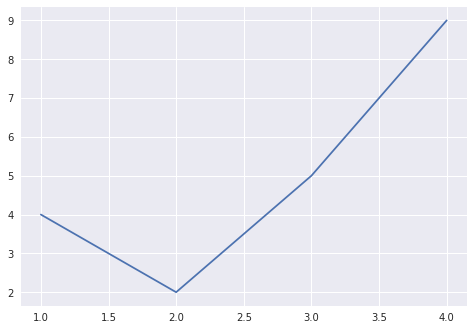

In [33]:
with plt.style.context("seaborn"):
    plt.plot([1,2,3,4], [4,2,5,9])

In [35]:
import numpy as np

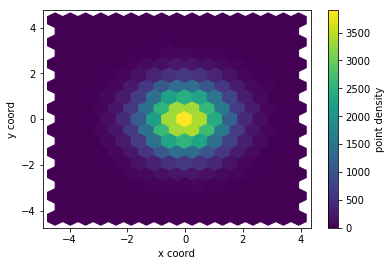

In [46]:
xy = np.random.normal(size=(100000,2), loc = [0.0, 0.0])
plt.hexbin(xy[:,0], xy[:,1], gridsize = 16)
plt.xlabel("x coord")
plt.ylabel("y coord")
plt.colorbar(label = "point density")

In [56]:
import ipywidgets

xy = np.random.normal(size=(100000,2), loc = [0.5, 0.5])

@ipywidgets.interact(variable = (4, 256, 8),
                    binned =["linear", "log"])
def doesnt_matter(variable, binned):
    plt.hexbin(xy[:,0], xy[:,1], gridsize = variable)

interactive(children=(IntSlider(value=124, description='variable', max=256, min=4, step=8), Dropdown(description='binned', options=('linear', 'log'), value='linear'), Output()), _dom_classes=('widget-interact',))

In [60]:
scale, offset = np.random.random(2)
x = np.mgrid[0.0:2*np.pi:1024j]
y = np.sin(scale * x + offset)

In [63]:
@ipywidgets.interact(scale1 = (0.0, 1.0, 0.01), offset1 = (0.0, 1.0, 0.01))
def overplot(scale1, offset1):
    plt.plot(x, y)
    plt.plot(x, np.sin(scale1 * x + offset1))

interactive(children=(FloatSlider(value=0.5, description='scale1', max=1.0, step=0.01), FloatSlider(value=0.5, description='offset1', max=1.0, step=0.01), Output()), _dom_classes=('widget-interact',))

In [64]:
vals = np.random.random((256, 256))

In [65]:
vals

array([[ 0.12167326,  0.0535234 ,  0.37947808, ...,  0.41976103,
         0.69456728,  0.01856306],
       [ 0.87879669,  0.456713  ,  0.19339956, ...,  0.53043996,
         0.73701933,  0.2552548 ],
       [ 0.48870158,  0.29664659,  0.04175843, ...,  0.52193626,
         0.72544536,  0.1071841 ],
       ..., 
       [ 0.02487238,  0.4674669 ,  0.45682766, ...,  0.17673501,
         0.46150429,  0.65648484],
       [ 0.98275924,  0.86544087,  0.60290805, ...,  0.12375587,
         0.77056507,  0.5772535 ],
       [ 0.07240654,  0.52667692,  0.72308359, ...,  0.68530687,
         0.44283201,  0.96728468]])

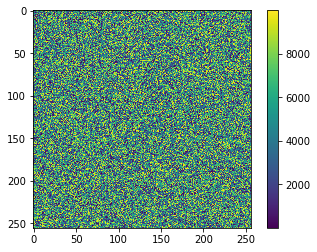

In [68]:
plt.imshow(vals*10000)
plt.colorbar()

In [73]:
r, g = np.mgrid[0.0:1.0:256j, 0.0:1.0:256j]
b = np.zeros((256, 256))

In [78]:
np.array([r,g,b]).T.shape

(256, 256, 3)

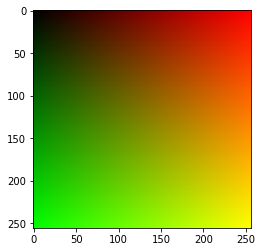

In [85]:
plt.imshow(np.array([r, g, b]).T)

In [87]:
x_vals = np.logspace(0, 1, 256)
y_vals = np.logspace(0, 2, 256)

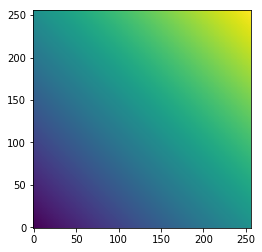

In [92]:
plt.imshow(r + g, origin='lower')

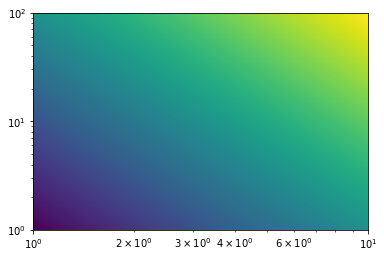

In [94]:
plt.pcolormesh(x_vals, y_vals, r + g)
plt.xscale("log")
plt.yscale("log")

In [96]:
!unzip 502nmos.zip
!unzip 656nmos.zip
!unzip 673nmos.zip

Archive:  502nmos.zip
  inflating: 502nmos.fits            
Archive:  656nmos.zip
  inflating: 656nmos.fits            
Archive:  673nmos.zip
  inflating: 673nmos.fits            


In [97]:
import astropy.io.fits as fits

In [98]:
nmos502 = fits.open("502nmos.fits")
nmos656 = fits.open("656nmos.fits")
nmos673 = fits.open("673nmos.fits")

In [107]:
v1 = nmos502[0].data
v2 = nmos656[0].data
v3 = nmos673[0].data

In [108]:
v1.shape, v2.shape, v3.shape

((1600, 1600), (1600, 1600), (1600, 1600))

In [115]:
@ipywidgets.interact(image = ['v1', 'v2', 'v3'])
def make_plot(image):
    if image == 'v1':
        v = v1
    elif image == 'v2':
        v = v2
    elif image == 'v3':
        v = v3
    plt.imshow(np.log10(v), origin='lower')

interactive(children=(Dropdown(description='image', options=('v1', 'v2', 'v3'), value='v1'), Output()), _dom_classes=('widget-interact',))

In [121]:
lv1 = np.log10(v1)
lv2 = np.log10(v2)
lv3 = np.log10(v3)

/home/mturk/conda-py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/mturk/conda-py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/home/mturk/conda-py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/mturk/conda-py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mturk/conda-py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
good_lv1 = lv1[~(np.isinf(lv1) | np.isnan(lv1))]
good_lv2 = lv2[~(np.isinf(lv2) | np.isnan(lv2))]
good_lv3 = lv3[~(np.isinf(lv3) | np.isnan(lv3))]

In [130]:
normv1 = (lv1 - good_lv1.min())/(good_lv1.max() - good_lv1.min())
normv2 = (lv2 - good_lv2.min())/(good_lv2.max() - good_lv2.min())
normv3 = (lv3 - good_lv3.min())/(good_lv3.max() - good_lv3.min())
image = np.array([normv1,normv2,normv3]).T

In [132]:
@ipywidgets.interact(red_scale = (0.0, 10.0, 0.1),
                    blue_scale = (0.0, 10.0, 0.1),
                    green_scale = (0.0, 10.0, 0.1))
def show_image(red_scale, blue_scale, green_scale):
    plt.imshow(image * [red_scale, blue_scale, green_scale])

interactive(children=(FloatSlider(value=5.0, description='red_scale', max=10.0), FloatSlider(value=5.0, description='blue_scale', max=10.0), FloatSlider(value=5.0, description='green_scale', max=10.0), Output()), _dom_classes=('widget-interact',))